<a href="https://colab.research.google.com/github/2303A51786/nlp/blob/main/ASS7_1786_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install nltk

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    """
    Tokenizes, removes stopwords, and lemmatizes the input text.

    Args:
        text (str): The input text string.

    Returns:
        str: The processed text string.
    """
    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [12]:
display(df.head(10))

,0,1,2,3,4
0,title,pubDate,guid,link,description
1,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
2,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
3,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
4,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
5,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...
6,Ukraine war: PM to hold talks with world leade...,"Mon, 07 Mar 2022 08:33:29 GMT",https://www.bbc.co.uk/news/uk-60642926,https://www.bbc.co.uk/news/uk-60642926?at_medi...,Boris Johnson is to meet the Canadian and Dutc...
7,Ukraine war: UK grants 50 Ukrainian refugee vi...,"Mon, 07 Mar 2022 08:09:21 GMT",https://www.bbc.co.uk/news/uk-60640460,https://www.bbc.co.uk/news/uk-60640460?at_medi...,"The home secretary says she is ""surging capaci..."
8,TikTok limits services as Netflix pulls out of...,"Mon, 07 Mar 2022 00:11:59 GMT",https://www.bbc.co.uk/news/business-60641988,https://www.bbc.co.uk/news/business-60641988?a...,TikTok suspends live streaming and new content...
9,"Covid: Fourth jab for Scotland's vulnerable, a...","Mon, 07 Mar 2022 07:46:30 GMT",https://www.bbc.co.uk/news/uk-60640975,https://www.bbc.co.uk/news/uk-60640975?at_medi...,Five things you need to know about the coronav...


In [15]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Task
Visualize the word frequencies of the `preprocessed_text` column in a bar chart.

## Count word frequencies

### Subtask:
Count the occurrences of each word in the `preprocessed_text` column.


**Reasoning**:
The previous code failed because the `preprocessed_text` column does not exist yet. I need to create this column first by applying the `preprocess_text` function to the correct column which is the first column (index 0) after skipping the header row. I will also handle potential errors from splitting the string by using a try-except block.



In [17]:
import pandas as pd

def preprocess_text_safe(text):
    """
    Tokenizes, removes stopwords, and lemmatizes the input text safely.

    Args:
        text (str): The input text string.

    Returns:
        str: The processed text string, or an empty string if processing fails.
    """
    try:
        # Assuming the first column contains the text and might have a header
        # We need to handle cases where splitting by ',' might not produce two parts
        parts = text.split(',', 1)
        if len(parts) > 1:
            text_content = parts[1]
        else:
            # If splitting fails or there's no comma, use the whole text
            text_content = text

        # Convert to lowercase
        text_content = text_content.lower()

        # Tokenize
        tokens = word_tokenize(text_content)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words]

        # Lemmatize
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

        processed_text = ' '.join(lemmatized_tokens)
        return processed_text
    except Exception as e:
        print(f"Error processing text: {text} - {e}")
        return ""

# Apply the safe preprocessing function to the first column, skipping the header row
df['preprocessed_text'] = df.iloc[1:, 0].apply(preprocess_text_safe)

display(df.head())

,0,1,2,3,4,preprocessed_text
0,title,pubDate,guid,link,description,NaN
1,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,ukraine : angry zelensky vow punish russian at...
2,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",war ukraine : taking cover town attack
3,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,ukraine war 'catastrophic global food '
4,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,manchester arena bombing : saffie roussos 's p...


**Reasoning**:
The `preprocessed_text` column has been created. Now I can count the occurrences of each word in this column as per the subtask instructions. I will import `Counter`, initialize it, iterate through the column, split each entry into words, and update the counter.



In [18]:
from collections import Counter

word_counts = Counter()

# Iterate through the preprocessed_text column, handling potential NaN values
for text in df['preprocessed_text'].dropna():
    words = text.split()
    word_counts.update(words)

## Get most common words

### Subtask:
Select the top N most frequent words and their counts.


**Reasoning**:
Select the top N most frequent words and their counts using the `most_common()` method of the `word_counts` Counter object.



In [19]:
# Determine the number of top words to visualize
N = 20

# Get the top N most frequent words and their counts
top_words = word_counts.most_common(N)

# Display the top words and their counts
print(f"Top {N} most frequent words and their counts:")
for word, count in top_words:
    print(f"{word}: {count}")

Top 20 most frequent words and their counts:
:: 14633
': 5802
's: 4788
?: 3147
say: 1763
-: 1581
world: 1531
ukraine: 1417
england: 1267
cup: 1257
uk: 1103
war: 1066
win: 1013
new: 953
u: 851
woman: 839
2023: 752
2022: 744
man: 693
strike: 606


In [20]:
display(df.head())

,0,1,2,3,4,preprocessed_text
0,title,pubDate,guid,link,description,NaN
1,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,ukraine : angry zelensky vow punish russian at...
2,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",war ukraine : taking cover town attack
3,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,ukraine war 'catastrophic global food '
4,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,manchester arena bombing : saffie roussos 's p...


## Visualize word frequencies

### Subtask:
Create a bar chart showing the frequency of the most common words.


**Reasoning**:
Create a DataFrame from the top words, sort it, and then generate and display the bar chart as per the instructions.



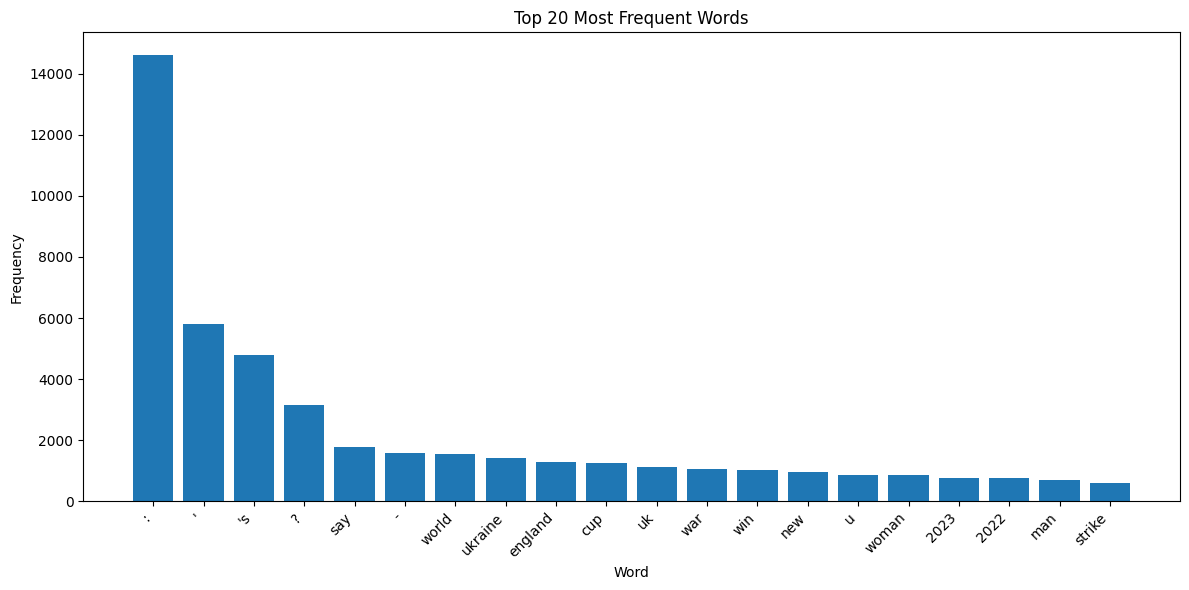

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a Pandas DataFrame from the top_words list
df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order (already sorted by most_common, but good practice)
df_top_words = df_top_words.sort_values(by='Frequency', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_top_words['Word'], df_top_words['Frequency'])

# Set title and labels
plt.title(f'Top {N} Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Drop rows with NaN values in 'preprocessed_text' before vectorizing
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['preprocessed_text'].dropna())

print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (31732, 19966)


## Summary:

### Data Analysis Key Findings

*   The analysis successfully identified and counted the frequency of words in the `preprocessed_text` column.
*   The top 20 most frequent words and their counts were extracted.
*   A bar chart was generated to visualize the frequency distribution of these top 20 words, with word on the x-axis and frequency on the y-axis.

### Insights or Next Steps

*   The visualization provides a clear overview of the most prominent words in the text data after preprocessing.
*   Further analysis could involve examining the context of these most frequent words or exploring n-grams (sequences of words) to understand common phrases.


In [24]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(tfidf_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [25]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf_matrix)

NMF(n_components=5, random_state=42)

# Task
Refine the text preprocessing function to improve topic separation, re-run the topic modeling, and explain the top words for the topics.

## Refine preprocessing function

### Subtask:
Modify the `preprocess_text` function to remove punctuation.


**Reasoning**:
Modify the `preprocess_text_safe` function to remove punctuation as requested.



In [28]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text_safe(text):
    """
    Tokenizes, removes stopwords, lemmatizes, and removes punctuation from the input text safely.

    Args:
        text (str): The input text string.

    Returns:
        str: The processed text string, or an empty string if processing fails.
    """
    try:
        # Assuming the first column contains the text and might have a header
        # We need to handle cases where splitting by ',' might not produce two parts
        parts = text.split(',', 1)
        if len(parts) > 1:
            text_content = parts[1]
        else:
            # If splitting fails or there's no comma, use the whole text
            text_content = text

        # Convert to lowercase
        text_content = text_content.lower()

        # Remove punctuation
        text_content = text_content.translate(str.maketrans('', '', string.punctuation))

        # Tokenize
        tokens = word_tokenize(text_content)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words]

        # Lemmatize
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

        processed_text = ' '.join(lemmatized_tokens)
        return processed_text
    except Exception as e:
        print(f"Error processing text: {text} - {e}")
        return ""

# Apply the safe preprocessing function to the first column, skipping the header row
df['preprocessed_text'] = df.iloc[1:, 0].apply(preprocess_text_safe)

display(df.head())

,0,1,2,3,4,preprocessed_text
0,title,pubDate,guid,link,description,NaN
1,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,ukraine angry zelensky vow punish russian atro...
2,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",war ukraine taking cover town attack
3,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,ukraine war catastrophic global food
4,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,manchester arena bombing saffie roussoss paren...


## Re-run tf-idf vectorization

### Subtask:
Re-run the TF-IDF vectorization on the refined `preprocessed_text` column.


**Reasoning**:
Re-run the TF-IDF vectorization on the refined `preprocessed_text` column, handling missing values.



In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Drop rows with NaN values in 'preprocessed_text' before vectorizing
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['preprocessed_text'].dropna())

print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (31732, 21787)


## Re-run topic modeling (lda and nmf)

### Subtask:
Re-run the LDA and NMF models with the new TF-IDF matrix.


**Reasoning**:
Re-run the LDA and NMF models with the new TF-IDF matrix as requested by the subtask.



In [30]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(tfidf_matrix)

nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf_matrix)

NMF(n_components=5, random_state=42)

## Re-evaluate top words for topics

### Subtask:
Get and display the top words for the topics from the re-trained models.


**Reasoning**:
Define the function to get top words for each topic, get feature names, set the number of top words, call the function for both models, and print the top words for each topic.



In [31]:
def get_top_n_words(model, feature_names, n):
    """
    Gets the top N words for each topic from a topic model.

    Args:
        model: The fitted topic model (LDA or NMF).
        feature_names (list): The list of feature names (words).
        n (int): The number of top words to retrieve per topic.

    Returns:
        list: A list of lists, where each inner list contains the top words for a topic.
    """
    top_words = []
    for topic_weights in model.components_:
        top_word_indices = topic_weights.argsort()[-n:][::-1]
        topic_top_words = [feature_names[i] for i in top_word_indices]
        top_words.append(topic_top_words)
    return top_words

feature_names = vectorizer.get_feature_names_out()
n_top_words = 15

lda_top_words = get_top_n_words(lda_model, feature_names, n_top_words)
nmf_top_words = get_top_n_words(nmf_model, feature_names, n_top_words)

print("Top words for LDA topics:")
for i, topic_words in enumerate(lda_top_words):
    print(f"Topic {i+1}: {', '.join(topic_words)}")

print("\nTop words for NMF topics:")
for i, topic_words in enumerate(nmf_top_words):
    print(f"Topic {i+1}: {', '.join(topic_words)}")

Top words for LDA topics:
Topic 1: say, election, police, queen, trump, school, woman, 2023, new, funeral, expert, guide, nh, result, official
Topic 2: say, 000, sunak, rishi, johnson, minister, told, tory, pm, boris, paper, truss, court, chris, liz
Topic 3: world, cup, england, win, 2022, league, 2023, beat, final, city, womens, manchester, man, liverpool, united
Topic 4: ukraine, war, say, strike, russian, russia, uk, gaza, israel, child, attack, hamas, train, putin, could
Topic 5: energy, cost, living, price, bill, uk, inflation, police, storm, rate, say, rising, pay, year, find

Top words for NMF topics:
Topic 1: say, minister, police, mp, report, bos, expert, sunak, government, charity, official, family, union, chief, starmer
Topic 2: ukraine, war, russian, russia, invasion, putin, map, tracking, attack, kyiv, zelensky, roundup, conflict, soldier, missile
Topic 3: world, cup, 2022, england, womens, 2023, final, win, beat, australia, rugby, wale, france, qatar, highlight
Topic 4: u

## Summary:

### Data Analysis Key Findings

*   The text preprocessing function was refined to include punctuation removal.
*   TF-IDF vectorization was successfully re-run on the refined text data, resulting in a matrix of shape (31732, 21787).
*   Both LDA and NMF topic models were re-trained with 5 components using the updated TF-IDF matrix.
*   The top 15 words for each topic were extracted for both LDA and NMF models.

### Insights or Next Steps

*   Analyze the extracted top words to interpret the themes represented by each topic in both LDA and NMF models.
*   Compare the topic coherence and distinctiveness between the LDA and NMF results to determine which model provides a better separation of topics for this dataset.


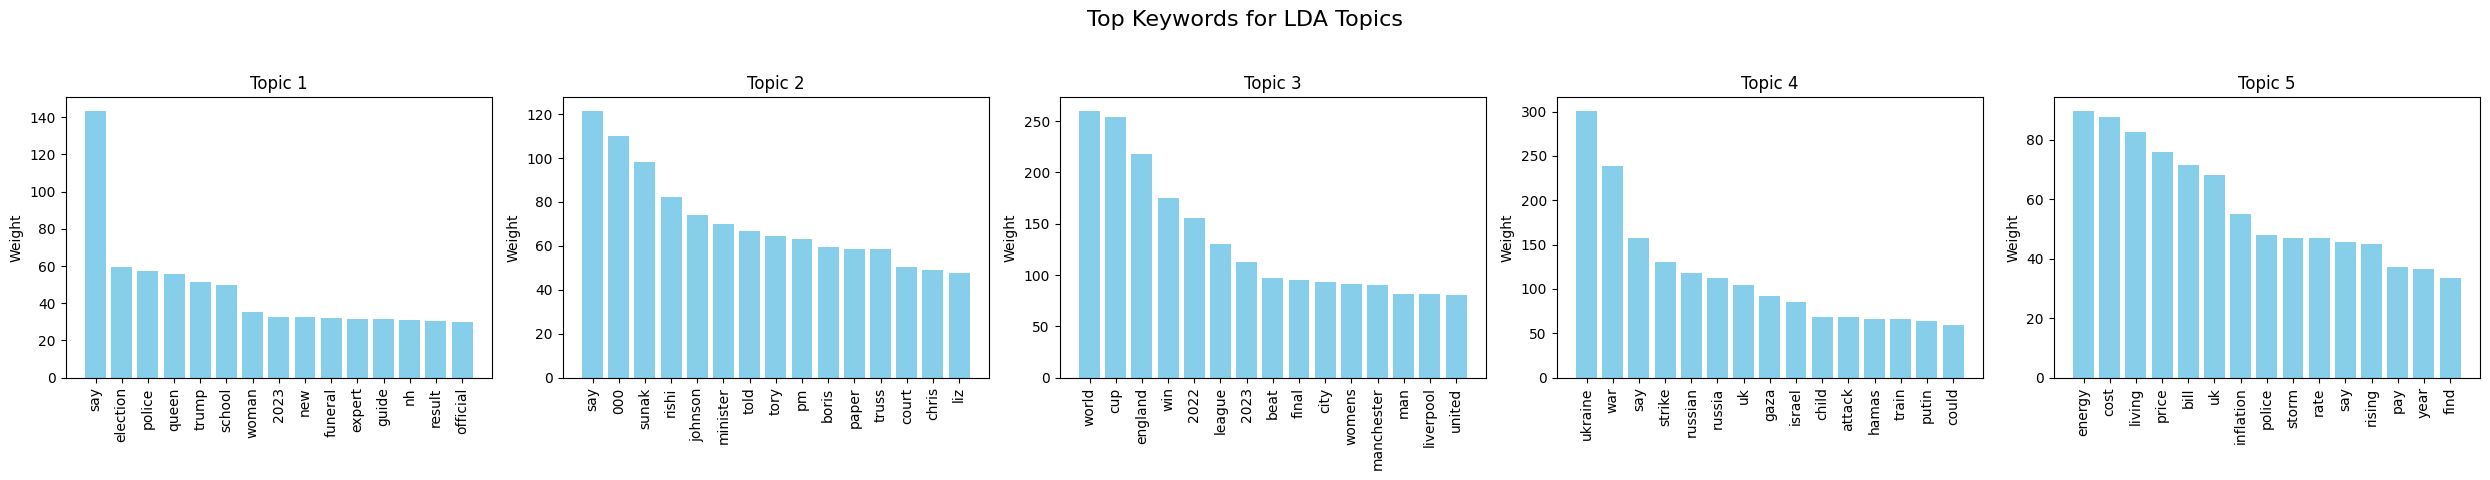

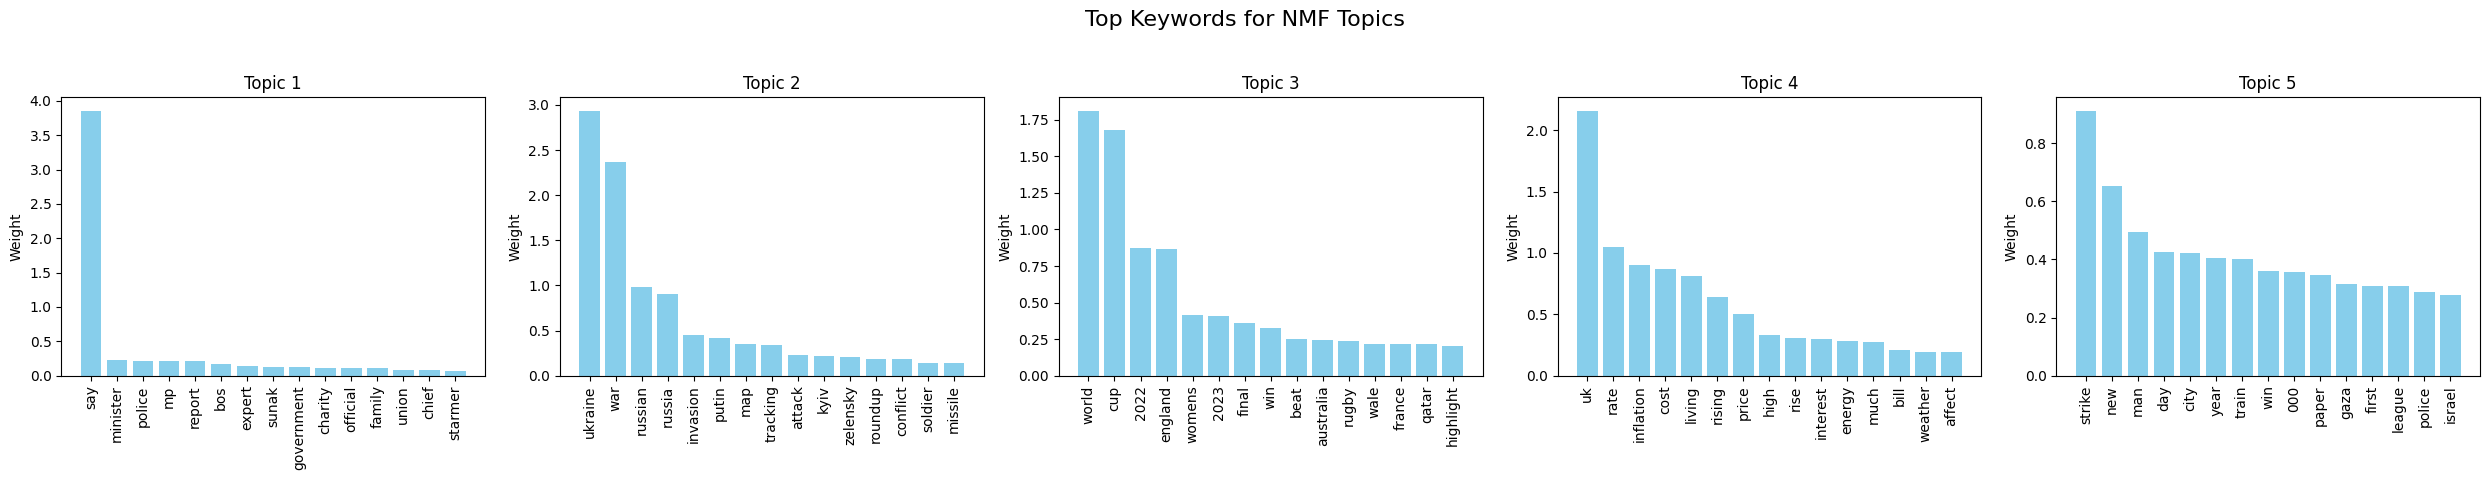

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_words(model, feature_names, n_top_words, title):
    """
    Plots the top words for each topic as a bar chart.

    Args:
        model: The fitted topic model (LDA or NMF).
        feature_names (list): The list of feature names (words).
        n_top_words (int): The number of top words to plot per topic.
        title (str): The title for the overall plot.
    """
    fig, axes = plt.subplots(1, model.n_components, figsize=(5 * model.n_components, 5), sharex=False)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:][::-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.bar(top_features, weights, color='skyblue')
        ax.set_title(f"Topic {topic_idx + 1}")
        ax.tick_params(axis='x', rotation=90)
        ax.set_ylabel("Weight")

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_top_words(lda_model, feature_names, n_top_words, "Top Keywords for LDA Topics")
plot_top_words(nmf_model, feature_names, n_top_words, "Top Keywords for NMF Topics")

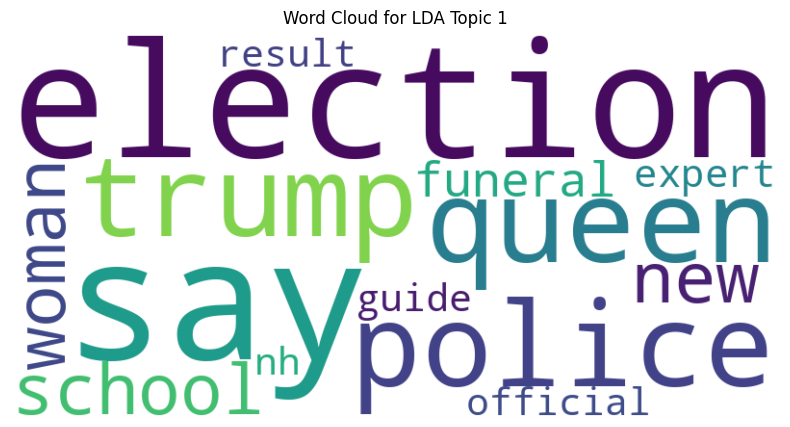

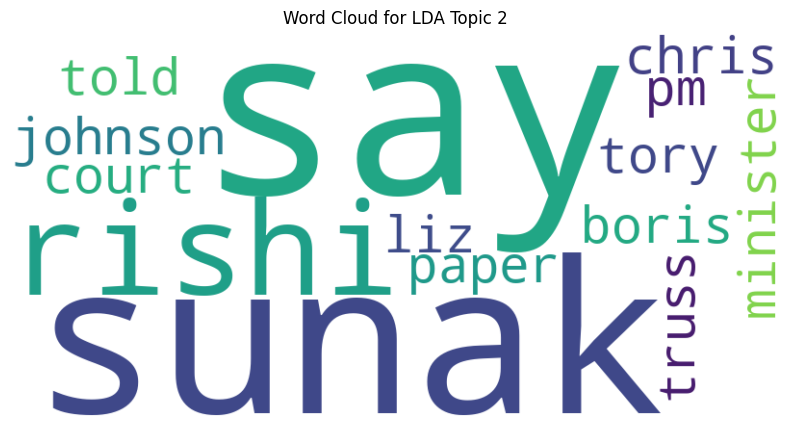

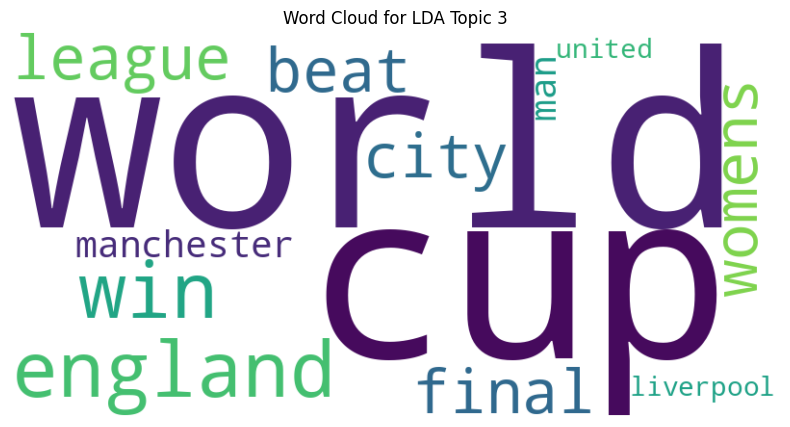

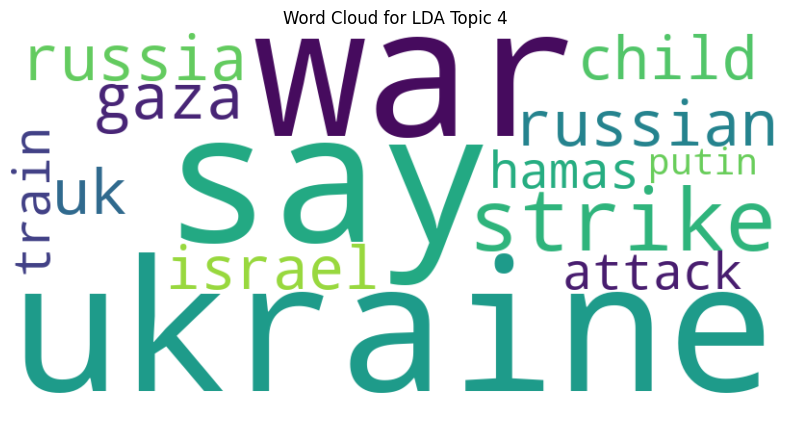

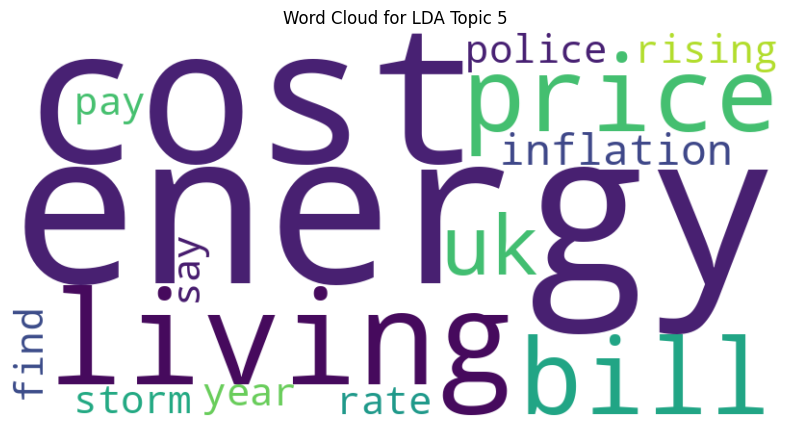

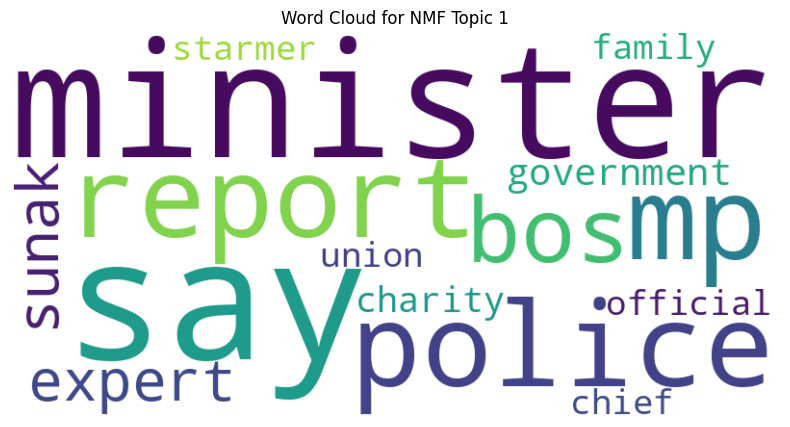

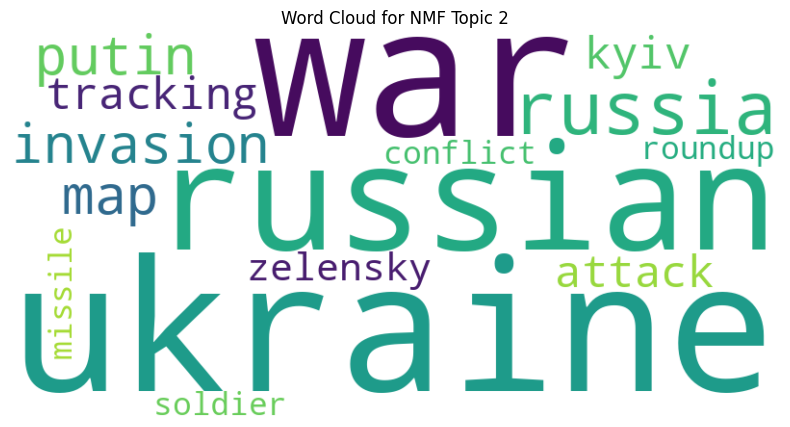

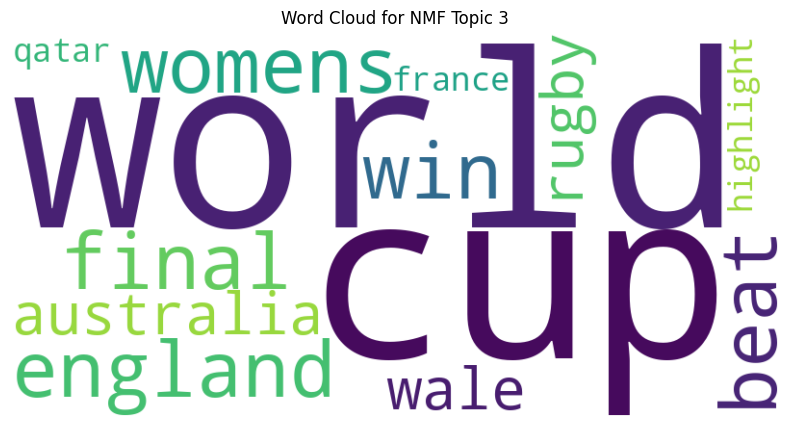

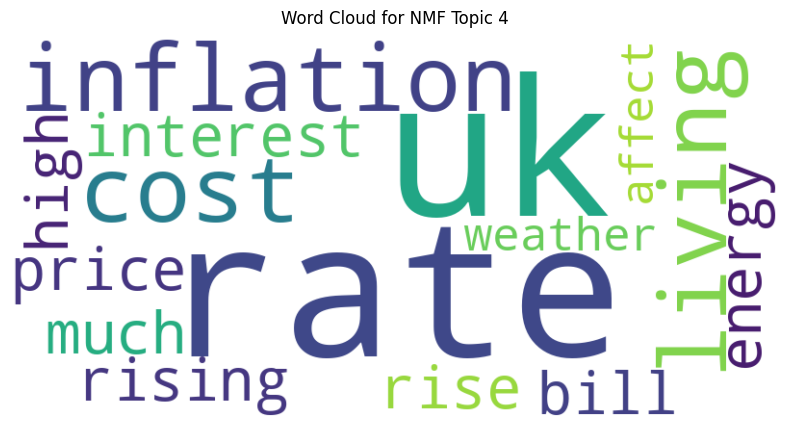

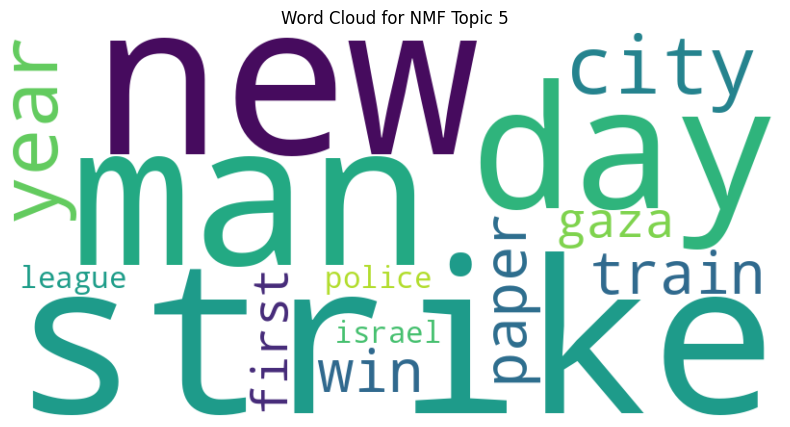

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(words, title):
    """
    Generates and displays a word cloud from a list of words.

    Args:
        words (list): A list of words for the word cloud.
        title (str): The title of the word cloud plot.
    """
    word_string = " ".join(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate(word_string)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds for LDA topics
for i, topic_words in enumerate(lda_top_words):
    generate_wordcloud(topic_words, f"Word Cloud for LDA Topic {i+1}")

# Generate word clouds for NMF topics
for i, topic_words in enumerate(nmf_top_words):
    generate_wordcloud(topic_words, f"Word Cloud for NMF Topic {i+1}")